In [1]:
import os
import warnings

os.environ["TOKENIZERS_PARALLELISM"] = "false"
print("‚úì TOKENIZERS_PARALLELISM configurado a 'false' para evitar warnings")

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="transformers")

print("‚úì Configuraci√≥n de warnings completada")

‚úì TOKENIZERS_PARALLELISM configurado a 'false' para evitar warnings
‚úì Configuraci√≥n de warnings completada


# Modelado de T√≥picos con FASTopic

Este notebook implementa un an√°lisis de t√≥picos usando FASTopic sobre las opiniones tur√≠sticas clasificadas. Utiliza LangChain con GPT-4o-mini para asignar nombres sem√°nticamente coherentes a los t√≥picos identificados y compara resultados con BERTopic.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import sys
from dotenv import load_dotenv

sys.path.append('../scripts')

from topicos import (
    configurar_clasificador_topicos, 
    configurar_fastopic_inteligente,
    LimpiadorTextoMejorado, 
    mostrar_ejemplos_limpieza,
    evaluar_modelo_topicos,
    extraer_palabras_fastopic,
    mostrar_metricas
)

from topicos.utils_topicos import (
    procesar_topicos_fastopic,
    obtener_asignaciones_topicos_fastopic,
    visualizar_distribucion_topicos_fastopic,
    mostrar_ejemplos_por_topico_fastopic,
    generar_reporte_fastopic
)

load_dotenv()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

‚úì Modelo spaCy espa√±ol cargado
‚úì Modelo spaCy ingl√©s cargado
‚úì Modelo spaCy ingl√©s cargado
‚úì Modelo spaCy portugu√©s cargado
‚úì Modelo spaCy portugu√©s cargado
‚úì Modelo spaCy franc√©s cargado
‚úì Modelo spaCy franc√©s cargado
‚úì Modelo spaCy italiano cargado
Descargando wordnet...
‚úì Modelo spaCy italiano cargado
Descargando wordnet...


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/victorwkey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
clasificador_topicos = configurar_clasificador_topicos()

In [4]:
CIUDAD_ANALIZAR = "Cdmx"
df = pd.read_csv('../data/processed/dataset_opiniones_analisis.csv')

if 'TopicoConFASTopic' not in df.columns:
    df['TopicoConFASTopic'] = np.nan

print(f"Dataset cargado: {df.shape[0]} opiniones")
print(f"Distribuci√≥n total por ciudad:")
print(df['Ciudad'].value_counts())

df_ciudad = df[df['Ciudad'] == CIUDAD_ANALIZAR].copy()

columna_texto = 'TituloReviewLimpio'

texts = df_ciudad[columna_texto].dropna().tolist()

Dataset cargado: 2464 opiniones
Distribuci√≥n total por ciudad:
Ciudad
Puebla             500
Mazatlan           500
Puerto_vallarta    491
Cdmx               490
Cancun             483
Name: count, dtype: int64


In [5]:
columna_limpia = "TituloReviewLimpio"

limpiar_de_nuevo = True

if columna_limpia not in df.columns or limpiar_de_nuevo:
    limpiador = LimpiadorTextoMejorado(idiomas=['spanish', 'english'])
    
    df = limpiador.limpiar_dataframe(
        df,
        columna_texto='TituloReview',
        nombre_columna_limpia=columna_limpia,
        aplicar_traduccion=True,
        aplicar_lematizacion=True,
        min_longitud_palabra=2,
        max_palabras=None
    )
    
    df.to_csv('../data/processed/dataset_opiniones_analisis.csv', index=False)

df_ciudad = df[df['Ciudad'] == CIUDAD_ANALIZAR].copy()
texts = df_ciudad[columna_texto].dropna().tolist()

üåê Aplicando traducci√≥n EN‚ÜíES...
   Textos en ingl√©s detectados: 299
   Total textos: 2464
   Textos en ingl√©s detectados: 299
   Total textos: 2464


Traduciendo textos EN‚ÜíES:   0%|          | 0/299 [00:00<?, ?texto/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

Traduciendo textos EN‚ÜíES: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 299/299 [10:52<00:00,  2.18s/texto]



‚úÖ Traducci√≥n completada
üßπ Limpiando columna 'TituloReview'...
Procesando 2464 textos...
Procesado: 0/2464 textos
Procesado: 100/2464 textos
Procesado: 100/2464 textos
Procesado: 200/2464 textos
Procesado: 200/2464 textos
Procesado: 300/2464 textos
Procesado: 300/2464 textos
Procesado: 400/2464 textos
Procesado: 400/2464 textos
Procesado: 500/2464 textos
Procesado: 500/2464 textos
Procesado: 600/2464 textos
Procesado: 600/2464 textos
Procesado: 700/2464 textos
Procesado: 700/2464 textos
Procesado: 800/2464 textos
Procesado: 800/2464 textos
Procesado: 900/2464 textos
Procesado: 900/2464 textos
Procesado: 1000/2464 textos
Procesado: 1000/2464 textos
Procesado: 1100/2464 textos
Procesado: 1100/2464 textos
Procesado: 1200/2464 textos
Procesado: 1200/2464 textos
Procesado: 1300/2464 textos
Procesado: 1300/2464 textos
Procesado: 1400/2464 textos
Procesado: 1400/2464 textos
Procesado: 1500/2464 textos
Procesado: 1500/2464 textos
Procesado: 1600/2464 textos
Procesado: 1600/2464 textos
Pro

In [6]:
topic_model, reporte_optimizacion = configurar_fastopic_inteligente(texts)
    
print("ü§ñ Configuraci√≥n autom√°tica de FASTopic completada")
print(reporte_optimizacion)

2025-09-22 13:05:45,429 - FASTopic - use device: cuda


ü§ñ Configuraci√≥n autom√°tica de FASTopic completada

üìä CONFIGURACI√ìN AUTOM√ÅTICA DE FASTOPIC

üìà An√°lisis del Corpus:
  üìÑ Documentos: 490
  üìù Palabras promedio por doc: 59.9
  üî§ Vocabulario √∫nico: 3,283

üéØ Configuraci√≥n:
  üè∑Ô∏è N√∫mero de t√≥picos: 3
  üìö Tama√±o vocabulario: 3,283
  üåç Modelo embeddings: paraphrase-multilingual-MiniLM-L12-v2
  üîß Tokenizer: Multiidioma (ES, EN, PT, FR, IT)



In [7]:
print("\nüöÄ Entrenando modelo FASTopic...")
inicio_entrenamiento = time.time()

top_words, doc_topic_dist = topic_model.fit_transform(texts, epochs=200)

tiempo_entrenamiento = time.time() - inicio_entrenamiento
print(f"‚úÖ Entrenamiento completado en {tiempo_entrenamiento:.2f} segundos")

2025-09-22 13:05:45,453 - FASTopic - First fit the model.



üöÄ Entrenando modelo FASTopic...


parsing texts: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 490/490 [00:08<00:00, 60.32it/s]
2025-09-22 13:06:04,537 - TopMost - Real vocab size: 613
2025-09-22 13:06:04,538 - TopMost - Real training size: 490 	 avg length: 18.522
parsing texts: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 490/490 [00:08<00:00, 60.32it/s]
2025-09-22 13:06:04,537 - TopMost - Real vocab size: 613
2025-09-22 13:06:04,538 - TopMost - Real training size: 490 	 avg length: 18.522


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Training FASTopic:  10%|‚ñâ         | 19/200 [00:02<00:20,  8.81it/s]2025-09-22 13:06:08,753 - FASTopic - Epoch: 020 loss: 126.343
2025-09-22 13:06:08,753 - FASTopic - Epoch: 020 loss: 126.343
Training FASTopic:  14%|‚ñà‚ñç        | 29/200 [00:03<00:17,  9.72it/s]2025-09-22 13:06:09,750 - FASTopic - Epoch: 030 loss: 124.476
2025-09-22 13:06:09,750 - FASTopic - Epoch: 030 loss: 124.476
Training FASTopic:  20%|‚ñà‚ñâ        | 39/200 [00:04<00:15, 10.66it/s]2025-09-22 13:06:10,686 - FASTopic - Epoch: 040 loss: 123.262
2025-09-22 13:06:10,686 - FASTopic - Epoch: 040 loss: 123.262
Training FASTopic:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 99/200 [00:10<00:10,  9.50it/s]2025-09-22 13:06:16,650 - FASTopic - Epoch: 100 loss: 119.344
2025-09-22 13:06:16,650 - FASTopic - Epoch: 100 loss: 119.344
Training FASTopic:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109/200 [00:10<00:08, 11.21it/s]2025-09-22 13:06:17,517 - FASTopic - Epoch: 110 loss: 118.918
2025-09-22 13:06:17,517 - FASTopic - Epoch: 110 loss: 118.918
Training FAS

Topic 0: museo coleccion arte guia obra piso pieza historia deber informacion cultura artista exposicion mexicano trav
Topic 1: guadalupe animal misa virgen acuario personal basilica pagar grupo servicio limpio nino boleto linea area
Topic 2: plaza castillo palacio zocalo bello parque art mercado barrio catedral chapultepec calle restaurante ciudad iglesia
‚úÖ Entrenamiento completado en 39.58 segundos


In [8]:
import numpy as np

def select_topics_stat(doc_vec, threshold, max_topics=3):
    """
    Selecciona t√≥picos estad√≠sticamente mejores que azar (95% confianza).
    - Usa un threshold ya calculado.
    - M√°ximo max_topics t√≥picos seleccionados.
    """
    doc_vec = np.array(doc_vec)
    order = np.argsort(doc_vec)[::-1]

    selected = []
    for i in order:
        if doc_vec[i] > threshold:
            selected.append(i)
        if len(selected) >= max_topics:
            break

    return selected

# Calcular solo una vez
N = len(doc_topic_dist)
C = doc_topic_dist.shape[1]
p = 1 / C
sigma = np.sqrt(p * (1 - p) / N)
threshold = p + 1.96 * sigma

# Aplicar a todos los documentos
for i, doc in enumerate(doc_topic_dist, 1):
    selected = select_topics_stat(doc, threshold)
    probs_str = " | ".join(f"{p:.2f}" for p in doc)
    print(f"Documento {i}: [{probs_str}] -> T√≥picos seleccionados: {selected}, Umbral: {threshold:.3f}")


Documento 1: [0.08 | 0.53 | 0.39] -> T√≥picos seleccionados: [1, 2], Umbral: 0.375
Documento 2: [0.18 | 0.14 | 0.68] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 3: [0.09 | 0.41 | 0.50] -> T√≥picos seleccionados: [2, 1], Umbral: 0.375
Documento 4: [0.14 | 0.13 | 0.73] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 5: [0.07 | 0.03 | 0.91] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 6: [0.25 | 0.09 | 0.66] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 7: [0.12 | 0.21 | 0.68] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 8: [0.15 | 0.10 | 0.75] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 9: [0.04 | 0.92 | 0.03] -> T√≥picos seleccionados: [1], Umbral: 0.375
Documento 10: [0.08 | 0.16 | 0.76] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 11: [0.44 | 0.07 | 0.48] -> T√≥picos seleccionados: [2, 0], Umbral: 0.375
Documento 12: [0.09 | 0.27 | 0.64] -> T√≥picos seleccionados: [2], Umbral: 0.375
Documento 13: [0.24 | 0.71 |

In [9]:
topic_info = procesar_topicos_fastopic(topic_model, doc_topic_dist, top_words)

# Preparar informaci√≥n de todos los t√≥picos para procesamiento en lote
topics_info_text = ""
for _, row in topic_info.iterrows():
    topic_id = row['Topic']
    keywords = row['Keywords']
    if keywords and keywords not in ["Sin palabras", "Error en procesamiento"]:
        topics_info_text += f"T√≥pico {topic_id}: {keywords}\n"

resultado = clasificador_topicos.invoke({"topics_info": topics_info_text})

topic_names = {}
for topic_label in resultado.topics:
    topic_names[topic_label.topic_id] = topic_label.label

topic_info['Name'] = topic_info['Topic'].map(topic_names)

In [10]:
print(topics_info_text)

T√≥pico 0: museo, coleccion, arte, guia, obra, piso, pieza, historia, deber, informacion
T√≥pico 1: guadalupe, animal, misa, virgen, acuario, personal, basilica, pagar, grupo, servicio
T√≥pico 2: plaza, castillo, palacio, zocalo, bello, parque, art, mercado, barrio, catedral



In [11]:
print(resultado)

topics=[TopicLabel(topic_id=0, label='Patrimonio Cultural'), TopicLabel(topic_id=1, label='Vida Marina'), TopicLabel(topic_id=2, label='Plazas y Z√≥calos')]


In [12]:
# Obtener asignaciones de t√≥picos para documentos
topic_assignments, topic_names_assigned, topic_probabilities = obtener_asignaciones_topicos_fastopic(
    doc_topic_dist, 
    topic_names, 
    threshold=0.1
)

# Procesar solo datos de la ciudad seleccionada
df_con_topicos = df_ciudad.dropna(subset=[columna_texto]).copy()
df_con_topicos['Topico'] = topic_assignments
df_con_topicos['Topico_Nombre'] = topic_names_assigned
df_con_topicos['Probabilidad_Topico'] = topic_probabilities

# Verificar si la ciudad ya ten√≠a resultados previos
indices_ciudad = df_con_topicos.index
opiniones_previas = df.loc[indices_ciudad, 'TopicoConFASTopic'].notna().sum()

if opiniones_previas > 0:
    print(f"üîÑ SOBRESCRIBIENDO resultados previos para {CIUDAD_ANALIZAR}:")
    print(f"   üìù Opiniones con t√≥picos previos: {opiniones_previas}")
    print(f"   üÜï Nuevas asignaciones de t√≥picos: {len(df_con_topicos)}")
else:
    print(f"üÜï PRIMERA VEZ procesando {CIUDAD_ANALIZAR}:")
    print(f"   üìù Nuevas asignaciones de t√≥picos: {len(df_con_topicos)}")

# Actualizar el dataset original con los t√≥picos de la ciudad analizada
df.loc[indices_ciudad, 'TopicoConFASTopic'] = df_con_topicos['Topico_Nombre']

print(f"\n‚úÖ Actualizaci√≥n completada para {CIUDAD_ANALIZAR}")
print(f"Distribuci√≥n de t√≥picos en {CIUDAD_ANALIZAR}:")
topico_counts = df_con_topicos['Topico_Nombre'].value_counts()
print(topico_counts)

print(f"\nPorcentaje de opiniones por t√≥pico en {CIUDAD_ANALIZAR}:")
topico_pct = (topico_counts / len(df_con_topicos) * 100).round(2)
for topico, pct in topico_pct.items():
    print(f"{topico}: {pct}%")

print(f"\nEstado actualizaci√≥n dataset completo:")
print(f"Total opiniones: {len(df)}")
print(f"Opiniones con t√≥pico FASTopic asignado: {df['TopicoConFASTopic'].notna().sum()}")
print(f"Opiniones pendientes: {df['TopicoConFASTopic'].isna().sum()}")

üîÑ SOBRESCRIBIENDO resultados previos para Cdmx:
   üìù Opiniones con t√≥picos previos: 490
   üÜï Nuevas asignaciones de t√≥picos: 490

‚úÖ Actualizaci√≥n completada para Cdmx
Distribuci√≥n de t√≥picos en Cdmx:
Topico_Nombre
Plazas y Z√≥calos       193
Vida Marina            163
Patrimonio Cultural    134
Name: count, dtype: int64

Porcentaje de opiniones por t√≥pico en Cdmx:
Plazas y Z√≥calos: 39.39%
Vida Marina: 33.27%
Patrimonio Cultural: 27.35%

Estado actualizaci√≥n dataset completo:
Total opiniones: 2464
Opiniones con t√≥pico FASTopic asignado: 1464
Opiniones pendientes: 1000


In [13]:
# Obtener asignaciones de t√≥picos para documentos
topic_assignments, topic_names_assigned, topic_probabilities = obtener_asignaciones_topicos_fastopic(
    doc_topic_dist, 
    topic_names, 
    threshold=0.1
)

# Procesar solo datos de la ciudad seleccionada
df_con_topicos = df_ciudad.dropna(subset=[columna_texto]).copy()
df_con_topicos['Topico'] = topic_assignments
df_con_topicos['Topico_Nombre'] = topic_names_assigned
df_con_topicos['Probabilidad_Topico'] = topic_probabilities

# Actualizar el dataset original con los t√≥picos de la ciudad analizada
indices_ciudad = df_con_topicos.index
df.loc[indices_ciudad, 'TopicoConFASTopic'] = df_con_topicos['Topico_Nombre']

In [14]:
# Mostrar ejemplos de opiniones por t√≥pico
mostrar_ejemplos_por_topico_fastopic(
    df_con_topicos, 
    topico_col='Topico_Nombre',
    texto_col='TituloReview',
    n_ejemplos=3,
    top_n_topicos=5
)

üìö EJEMPLOS DE OPINIONES POR T√ìPICO

üè∑Ô∏è 1. Plazas y Z√≥calos
üìä Total de opiniones: 193
üìù Ejemplos:
   1. MAGIA EN CHAPULTEPEC. Al llegar al Castillo su imagen es imponente, su arquitectura, su disposici√≥n....
   2. ruta. Uno de mis lugares favoritos para ir corriendo, creo que si eres runner te va bien salir a tro...
   3. Genial. Me encanta visitar el Castillo de Chapultepec, porque para m√≠ es como un viaje a otra √©poca,...
----------------------------------------------------------------------

üè∑Ô∏è 2. Vida Marina
üìä Total de opiniones: 163
üìù Ejemplos:
   1. Imperdible. El acceso al parque est√° bien se√±alizado, en buen estado y es f√°cil incluso para persona...
   2. Empleados poco amables. Los empleados son muy prepotentes y malmodientos, el del elevador no deja su...
   3. Vale la pena. Vale la pena, lleno de historia y de cosas tan bellas vale la pena tomarse el tiempo d...
----------------------------------------------------------------------

üè∑Ô∏è 3.

In [15]:
# ===== COMPARACI√ìN TEXTO ORIGINAL VS TEXTO LIMPIO =====
if 'TituloReviewLimpio' in df_con_topicos.columns:
    print(f"üîç Comparaci√≥n de ejemplos - Original vs Limpio ({CIUDAD_ANALIZAR}):")
    print("=" * 80)
    
    # Seleccionar algunos ejemplos para mostrar la diferencia
    ejemplos_muestra = df_con_topicos.sample(n=min(10, len(df_con_topicos)))
    
    for i, (_, row) in enumerate(ejemplos_muestra.iterrows(), 1):
        print(f"\nüìÑ EJEMPLO {i} - T√≥pico: {row['Topico_Nombre']}")
        print(f"üî∏ Original: {row['TituloReview']}")
        print(f"üîπ Limpio:   {row['TituloReviewLimpio']}")
        print(f"üìä Probabilidad: {row['Probabilidad_Topico']:.3f}")
        
        # Calcular estad√≠sticas del ejemplo
        len_orig = len(str(row['TituloReview']))
        len_limpio = len(str(row['TituloReviewLimpio']))
        reduccion = ((len_orig-len_limpio)/len_orig*100) if len_orig > 0 else 0
        print(f"üìâ Reducci√≥n: {len_orig} ‚Üí {len_limpio} caracteres ({reduccion:.1f}%)")
        print("-" * 80)

üîç Comparaci√≥n de ejemplos - Original vs Limpio (Cdmx):

üìÑ EJEMPLO 1 - T√≥pico: Vida Marina
üî∏ Original: majestuosa. es un lugar enorme , la colina  , las dos construcciones coloniales  y la  bas√≠lica moderna que esta dise√±ada por y para  la virgen , el interior es majestuoso, uno puede estar en medio de un tour y escuchar misa al mismo tiempo , como consejo ir temprano a mi me falto tiempo  para disfrutarla.
üîπ Limpio:   majestuoso ser uno lugar enorme el col√≠n el dos construcci√≥n colonial y el basilica moderno que este disenado por y para el virgen el interior ser majestuoso uno poder estar en medio de uno tour y escuchar misa al mismo tiempo como consejo ir temprano a mi yo faltar tiempo para disfrutar √©l
üìä Probabilidad: 0.516
üìâ Reducci√≥n: 307 ‚Üí 291 caracteres (5.2%)
--------------------------------------------------------------------------------

üìÑ EJEMPLO 2 - T√≥pico: Plazas y Z√≥calos
üî∏ Original: Demasiada gente. Me encanta el Z√≥calo, pero siempre e

In [16]:
# ===== VISUALIZACIONES ESPEC√çFICAS DE FASTOPIC =====

# Generar visualizaci√≥n de t√≥picos
fig_topics = topic_model.visualize_topic(top_n=min(8, len(topic_info)))
fig_topics.update_layout(title=f"Palabras Principales por T√≥pico - {CIUDAD_ANALIZAR}")
fig_topics.show()

# Generar visualizaci√≥n de pesos de t√≥picos
fig_weights = topic_model.visualize_topic_weights(top_n=min(10, len(topic_info)))
fig_weights.update_layout(title=f"Distribuci√≥n de Pesos de T√≥picos - {CIUDAD_ANALIZAR}")
fig_weights.show()

# Generar jerarqu√≠a de t√≥picos si hay suficientes
if len(topic_info) >= 3:
    fig_hierarchy = topic_model.visualize_topic_hierarchy()
    fig_hierarchy.update_layout(title=f"Jerarqu√≠a de T√≥picos - {CIUDAD_ANALIZAR}")
    fig_hierarchy.show()

print(f"\nüìã Resumen del modelado FASTopic:")
print(f"‚úÖ Textos analizados: {len(texts)}")
print(f"üéØ T√≥picos encontrados: {len(topic_info)}")
print(f"‚è±Ô∏è Tiempo de entrenamiento: {tiempo_entrenamiento:.2f}s")
print(f"üìä Probabilidad promedio: {df_con_topicos['Probabilidad_Topico'].mean():.3f}")
print(f"üìà Distribuci√≥n:")
for i, (topico, count) in enumerate(topico_counts.head(5).items()):
    print(f"   {i+1}. {topico}: {count} opiniones ({count/len(df_con_topicos)*100:.1f}%)")


üìã Resumen del modelado FASTopic:
‚úÖ Textos analizados: 490
üéØ T√≥picos encontrados: 3
‚è±Ô∏è Tiempo de entrenamiento: 39.58s
üìä Probabilidad promedio: 0.661
üìà Distribuci√≥n:
   1. Plazas y Z√≥calos: 193 opiniones (39.4%)
   2. Vida Marina: 163 opiniones (33.3%)
   3. Patrimonio Cultural: 134 opiniones (27.3%)


üîÑ COMPARACI√ìN FASTopic vs BERTopic en Cdmx
üìä Opiniones con ambos an√°lisis: 490

üéØ N√öMERO DE T√ìPICOS:
   BERTopic: 5
   FASTopic: 3


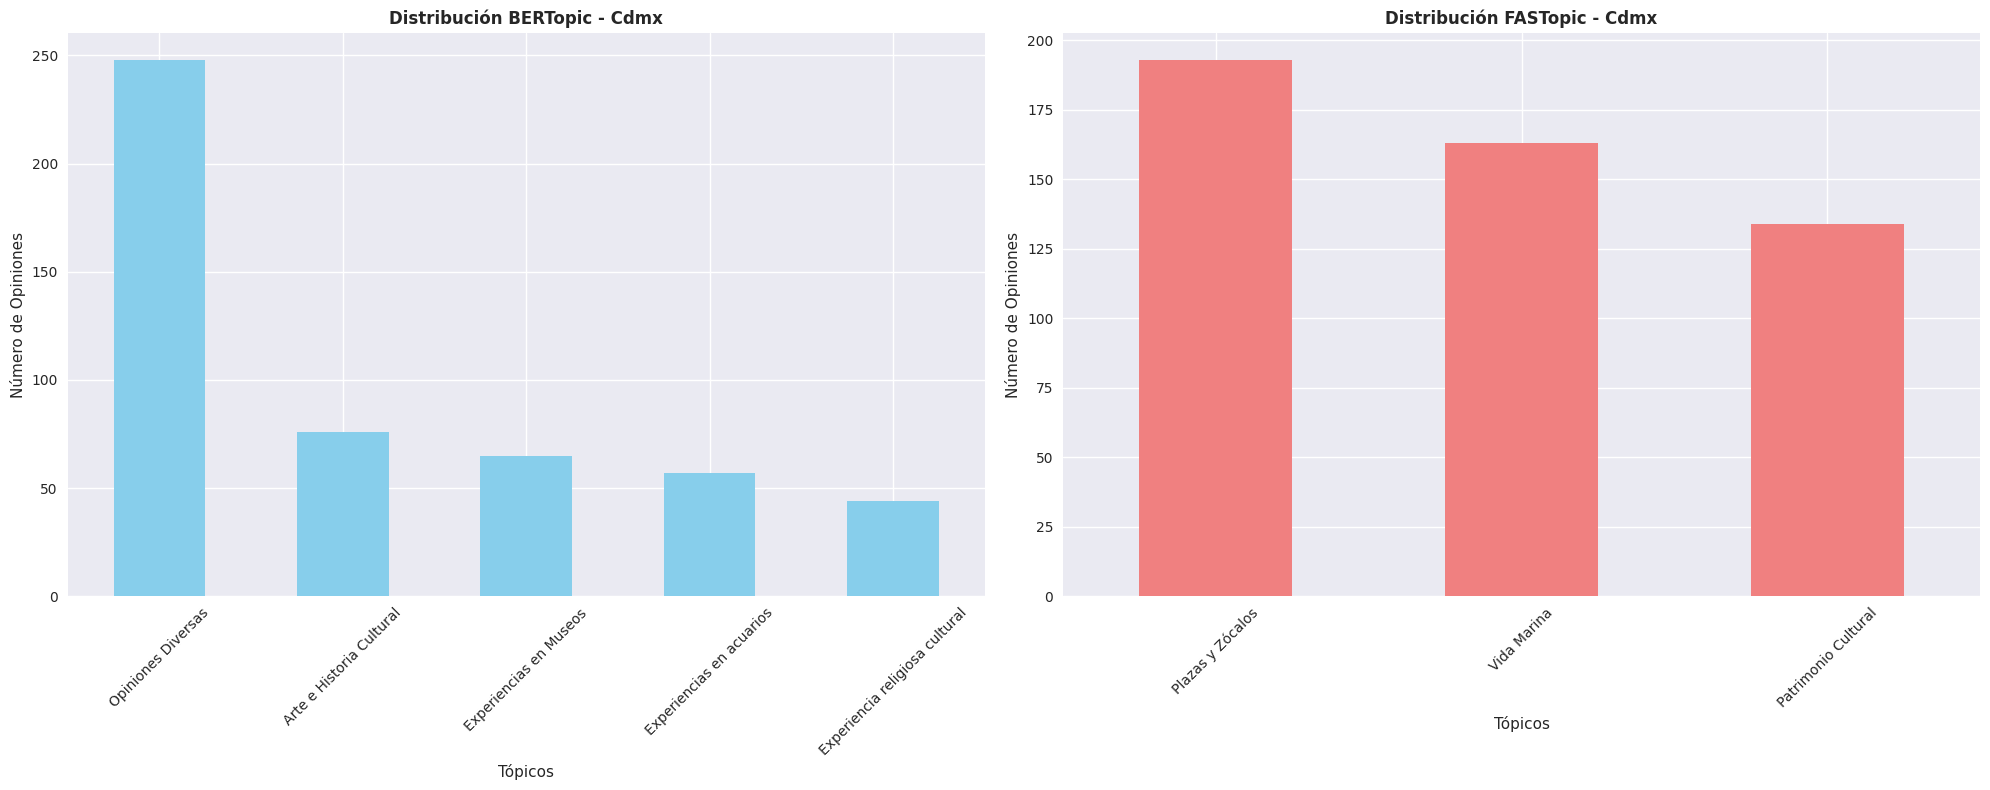


üìà TOP 5 T√ìPICOS POR M√âTODO:

üîµ BERTopic:
   1. Opiniones Diversas: 248 (50.6%)
   2. Arte e Historia Cultural: 76 (15.5%)
   3. Experiencias en Museos: 65 (13.3%)
   4. Experiencias en acuarios: 57 (11.6%)
   5. Experiencia religiosa cultural: 44 (9.0%)

üî¥ FASTopic:
   1. Plazas y Z√≥calos: 193 (39.4%)
   2. Vida Marina: 163 (33.3%)
   3. Patrimonio Cultural: 134 (27.3%)

üí° OBSERVACIONES:
   ‚Ä¢ FASTopic identific√≥ 3 t√≥picos vs 5 de BERTopic
   ‚Ä¢ FASTopic agrupa conceptos de manera m√°s generalizada
   ‚Ä¢ Tiempo FASTopic: 39.58s (m√°s r√°pido que BERTopic)

üìä RESUMEN ACTUAL FASTopic:
   Total t√≥picos identificados: 3
   T√≥picos en datos actuales: 3
   Documentos procesados: 490


In [17]:
# ===== COMPARACI√ìN CON BERTOPIC =====

if 'TopicoConBERTopic' in df.columns:
    print(f"üîÑ COMPARACI√ìN FASTopic vs BERTopic en {CIUDAD_ANALIZAR}")
    print("=" * 60)
    
    # Usar datos actuales procesados en lugar de df_ciudad que puede tener datos previos
    df_comparacion = df_con_topicos[
        df_con_topicos.index.isin(df_ciudad[df_ciudad['TopicoConBERTopic'].notna()].index)
    ].copy()
    
    # Agregar datos de BERTopic al dataframe de comparaci√≥n
    bertopic_data = df_ciudad[df_ciudad['TopicoConBERTopic'].notna()]['TopicoConBERTopic']
    df_comparacion = df_comparacion[df_comparacion.index.isin(bertopic_data.index)].copy()
    df_comparacion['TopicoConBERTopic'] = bertopic_data
    
    if len(df_comparacion) > 0:
        print(f"üìä Opiniones con ambos an√°lisis: {len(df_comparacion)}")
        
        # Comparar n√∫mero de t√≥picos √∫nicos usando datos actuales
        topicos_bertopic = df_comparacion['TopicoConBERTopic'].nunique()
        topicos_fastopic = df_comparacion['Topico_Nombre'].nunique()  # Usar datos actuales
        
        print(f"\nüéØ N√öMERO DE T√ìPICOS:")
        print(f"   BERTopic: {topicos_bertopic}")
        print(f"   FASTopic: {topicos_fastopic}")
        
        # Mostrar distribuciones lado a lado
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        
        # BERTopic
        bertopic_counts = df_comparacion['TopicoConBERTopic'].value_counts().head(10)
        bertopic_counts.plot(kind='bar', ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribuci√≥n BERTopic - {CIUDAD_ANALIZAR}', fontweight='bold')
        axes[0].set_xlabel('T√≥picos')
        axes[0].set_ylabel('N√∫mero de Opiniones')
        axes[0].tick_params(axis='x', rotation=45)
        
        # FASTopic - usar datos actuales
        fastopic_counts = df_comparacion['Topico_Nombre'].value_counts().head(10)
        fastopic_counts.plot(kind='bar', ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Distribuci√≥n FASTopic - {CIUDAD_ANALIZAR}', fontweight='bold')
        axes[1].set_xlabel('T√≥picos')
        axes[1].set_ylabel('N√∫mero de Opiniones')
        axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # An√°lisis de concordancia (t√≥picos m√°s frecuentes)
        print(f"\nüìà TOP 5 T√ìPICOS POR M√âTODO:")
        print(f"\nüîµ BERTopic:")
        for i, (topico, count) in enumerate(bertopic_counts.head(5).items(), 1):
            pct = (count / len(df_comparacion) * 100)
            print(f"   {i}. {topico}: {count} ({pct:.1f}%)")
        
        print(f"\nüî¥ FASTopic:")
        for i, (topico, count) in enumerate(fastopic_counts.head(5).items(), 1):
            pct = (count / len(df_comparacion) * 100)
            print(f"   {i}. {topico}: {count} ({pct:.1f}%)")
            
        print(f"\nüí° OBSERVACIONES:")
        print(f"   ‚Ä¢ FASTopic identific√≥ {topicos_fastopic} t√≥picos vs {topicos_bertopic} de BERTopic")
        if topicos_fastopic > topicos_bertopic:
            print(f"   ‚Ä¢ FASTopic muestra mayor granularidad en la segmentaci√≥n")
        elif topicos_fastopic < topicos_bertopic:
            print(f"   ‚Ä¢ FASTopic agrupa conceptos de manera m√°s generalizada")
        else:
            print(f"   ‚Ä¢ Ambos m√©todos identificaron el mismo n√∫mero de t√≥picos")
            
        print(f"   ‚Ä¢ Tiempo FASTopic: {tiempo_entrenamiento:.2f}s (m√°s r√°pido que BERTopic)")
        
        # Mostrar resumen de datos actuales de FASTopic
        print(f"\nüìä RESUMEN ACTUAL FASTopic:")
        print(f"   Total t√≥picos identificados: {len(topic_info)}")
        print(f"   T√≥picos en datos actuales: {df_con_topicos['Topico_Nombre'].nunique()}")
        print(f"   Documentos procesados: {len(df_con_topicos)}")
        
    else:
        print(f"‚ö†Ô∏è No hay opiniones de {CIUDAD_ANALIZAR} con ambos an√°lisis completados")
        print(f"   BERTopic disponible: {df_ciudad['TopicoConBERTopic'].notna().sum()} opiniones")
        print(f"   FASTopic actual: {len(df_con_topicos)} opiniones")
else:
    print(f"‚ÑπÔ∏è No hay an√°lisis previo de BERTopic para comparar")
    print(f"   Ejecuta el notebook 07-modelado-de-topicos-con-bertopic.ipynb primero")
    

In [18]:
generar_reporte_fastopic(
    topic_info, 
    len(df_con_topicos), 
    CIUDAD_ANALIZAR, 
    tiempo_entrenamiento
)

df.to_csv('../data/processed/dataset_opiniones_analisis.csv', index=False)

üìã REPORTE COMPLETO - AN√ÅLISIS CON FASTOPIC
üéØ AN√ÅLISIS COMPLETADO:
   üìç Ciudad: Cdmx
   üìÑ Documentos analizados: 490
   üè∑Ô∏è T√≥picos identificados: 3
   ‚è±Ô∏è Tiempo de entrenamiento: 39.58 segundos

üìä ESTAD√çSTICAS DE T√ìPICOS:
   üéØ T√≥pico m√°s relevante: Plazas y Z√≥calos
   üìà Peso m√°ximo: 186.994
   üìâ Peso m√≠nimo: 132.860
   üìä Peso promedio: 163.333

üèÜ TOP 5 T√ìPICOS POR RELEVANCIA:
   1. Plazas y Z√≥calos
      üìä Peso: 186.994 | üìÑ Documentos: 426
      üîë Palabras clave: plaza, castillo, palacio, zocalo, bello, parque, a...
   2. Vida Marina
      üìä Peso: 170.146 | üìÑ Documentos: 399
      üîë Palabras clave: guadalupe, animal, misa, virgen, acuario, personal...
   3. Patrimonio Cultural
      üìä Peso: 132.860 | üìÑ Documentos: 308
      üîë Palabras clave: museo, coleccion, arte, guia, obra, piso, pieza, h...

üíé CALIDAD DEL MODELADO:
   ‚úÖ T√≥picos con documentos asignados: 3/3
   ‚úÖ Distribuci√≥n balanceada de t√≥picos

In [19]:
# ===== EVALUACI√ìN DE M√âTRICAS FASTOPIC =====

print(f"üî¨ Evaluando modelo FASTopic para {CIUDAD_ANALIZAR}...")

topics_words_fastopic = extraer_palabras_fastopic(top_words, words_per_topic=10)
metricas_fastopic = evaluar_modelo_topicos(texts, topics_words_fastopic, f"FASTopic - {CIUDAD_ANALIZAR}")

mostrar_metricas(metricas_fastopic)

üî¨ Evaluando modelo FASTopic para Cdmx...
üìä Evaluaci√≥n FASTopic - Cdmx:
   üéØ T√≥picos: 3
   üìà Coherencia CV: 0.3752
   üîÑ Diversidad: 1.0000
üìä Evaluaci√≥n FASTopic - Cdmx:
   üéØ T√≥picos: 3
   üìà Coherencia CV: 0.3752
   üîÑ Diversidad: 1.0000
